<a href="https://colab.research.google.com/github/EunJeongCho/EunJeongCho/blob/main/w10_statistics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic statistics in Python - Linear model & Visualization

**Why Python for statistics?**

R is a language dedicated to statistics. Python is a general-purpose language with statistics modules. R has more statistical analysis features than Python, and specialized syntaxes. However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

---
Requirements
1.   Standard scientific Python environment (numpy, scipy, matplotlib)
2.   Pandas
3.   Statsmodels
4.   Seaborn
---

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%matplotlib inline

### **3. Linear models, multiple factors, and analysis of variance**

3.1. Use "[*formulas*](https://www.statsmodels.org/stable/example_formulas.html)" to specify statistical models in Python

A simple linear regression

---
Given two set of observations, *x* and *y*, we want to test the hypothesis that *y* is a linear function of *x*. In other terms:

linear_regression.png

where *e* is observation noise. We will use the statsmodels module to:
1.   Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
2.   Test that *coef* is non zero.

First, we generate simulated data according to the model:

In [26]:
import numpy as np
import pandas

x = np.linspace(-5, 5, 20) # 샘플링
np.random.seed(1) # 잔차를 랜덤으로 추가

# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

print(data)

           x          y
0  -5.000000 -13.502619
1  -4.473684 -20.868078
2  -3.947368 -18.954792
3  -3.421053 -19.555032
4  -2.894737 -10.222580
5  -2.368421 -21.311418
6  -1.842105  -3.547069
7  -1.315789 -11.992196
8  -0.789474  -6.092265
9  -0.263158  -6.786955
10  0.263158   1.637905
11  0.789474 -10.872142
12  1.315789  -2.342300
13  1.842105  -1.009902
14  2.368421   6.640341
15  2.894737  -0.715355
16  3.421053   4.573445
17  3.947368   3.330672
18  4.473684   8.589908
19  5.000000  12.331261


Then we specify an OLS model and fit it.

In [27]:
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit() # 앞에서 만든 데이터 프레임 이름이 data
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 06 May 2021   Prob (F-statistic):           8.56e-08
Time:                        09:04:00   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

Statsmodels uses a statistical terminology: the *y* variable in statsmodels is called "endogenous" while the *x* variable is called "exogenous". This is discussed in more detail [here](https://www.statsmodels.org/devel/endog_exog).

To simplify, *y* (endogenous) is the value you are trying to predict, while *x* (exogenous) represents the features you are using to make the prediction.

Let's retrieve the estimated parameters from the model above.

In [28]:
print(model.params)

predicted_y = model.params.x * x + model.params.Intercept

# 앞에서 찾은 coef가 model.params.x, model.params.Intercept 에 들어있음

data = data.join(pandas.DataFrame({'predicted_y': predicted_y}))

print(data)

Intercept   -5.533459
x            2.936888
dtype: float64
           x          y  predicted_y
0  -5.000000 -13.502619   -20.217900
1  -4.473684 -20.868078   -18.672169
2  -3.947368 -18.954792   -17.126439
3  -3.421053 -19.555032   -15.580708
4  -2.894737 -10.222580   -14.034977
5  -2.368421 -21.311418   -12.489247
6  -1.842105  -3.547069   -10.943516
7  -1.315789 -11.992196    -9.397785
8  -0.789474  -6.092265    -7.852055
9  -0.263158  -6.786955    -6.306324
10  0.263158   1.637905    -4.760593
11  0.789474 -10.872142    -3.214863
12  1.315789  -2.342300    -1.669132
13  1.842105  -1.009902    -0.123401
14  2.368421   6.640341     1.422330
15  2.894737  -0.715355     2.968060
16  3.421053   4.573445     4.513791
17  3.947368   3.330672     6.059522
18  4.473684   8.589908     7.605252
19  5.000000  12.331261     9.150983


Categorical variables: comparing groups or multiple categories

---
Let us go back the data on brain size.

In [29]:
data_brain = pandas.read_csv('/content/drive/MyDrive/Method2/data/w09_brain_size.csv', sep=';', na_values=".")

We can write a comparison between IQ of male and female using a linear model.

In [30]:
model = ols("VIQ ~ Gender + 1", data_brain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.445
Time:                        09:04:00   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

the "Gender" is automatically detected as a categorical variable, and thus each of its different values are treated as different entities.

An integer column can be forced to be treated as categorical using:

In [31]:
model = ols('VIQ ~ C(Gender)', data_brain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.445
Time:                        09:04:00   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

By default, statsmodels treats a categorical variable with K possible values as K-1 ‘dummy’ boolean variables (the last level being absorbed into the intercept term). This is almost always a good default choice - however, it is possible to specify [different encodings](https://www.statsmodels.org/devel/contrasts.html) for categorical variables.

Link to t-tests between different FSIQ and PIQ

---
To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable.

In [32]:
data_fisq = pandas.DataFrame({'iq': data_brain['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data_brain['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long) 

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [33]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.643
Time:                        09:04:00   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

We can see that we retrieve the same values for *t*-test and corresponding *p*-values for the effect of the type of iq than the previous *t*-test.

In [34]:
from scipy import stats

stats.ttest_ind(data_brain['FSIQ'], data_brain['PIQ'])  

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

3.2. Multiple Regression: including multiple factors

Consider a linear model explaining a variable *z* (the dependent variable) with 2 variables *x* and *y*.
c614adc419681149b0169764207ca1a3edb8a1b7.png


Such a model can be seen in 3D as fitting a plane to a cloud of (*x*, *y*, *z*) points.

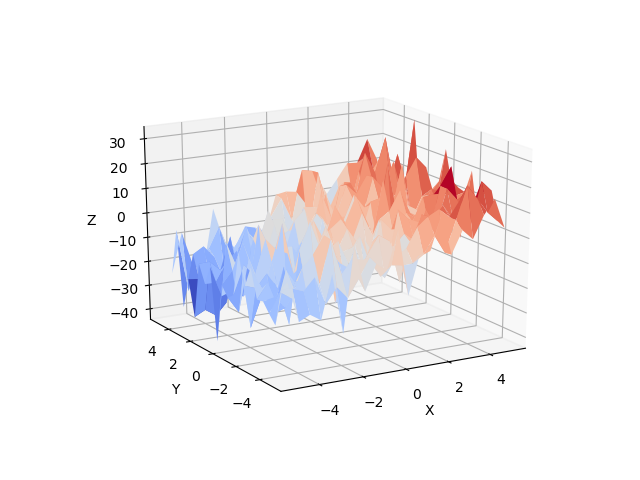

Example: the iris data

---
Sepal and petal size tend to be related: bigger flowers are bigger! But is there in addition a systematic effect of species?
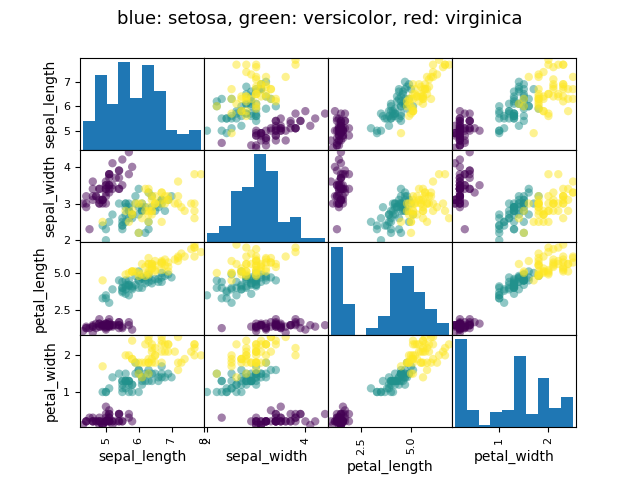

In [35]:
data_iris = pandas.read_csv('/content/drive/MyDrive/Method2/data/w10_iris.csv')

print(data_iris)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [36]:
model = ols('sepal_width ~ name + petal_length', data_iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.58e-20
Time:                        09:04:00   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)

In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of "contrast" on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test:

In [37]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[3.24533535]]), p=0.07369058781701415, df_denom=146, df_num=1>


In [38]:
print(model.f_test([1, 0, -1, 0]))

<F test: F=array([[610.70667306]]), p=5.022442670078661e-54, df_denom=146, df_num=1>


**Guiz**

---
*   Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight.
---


### **4. More visualization: seaborn for statistical exploration**

[Seaborn](https://seaborn.pydata.org/) combines simple statistical fits with plotting on pandas dataframes.

Example: the wages data


In [39]:
data_wages = pandas.read_csv('/content/drive/MyDrive/Method2/data/w10_wages.csv')

print(data_wages)

              wage  height     sex   race  education  age
0     79571.299010   73.89    male  white         16   49
1     96396.988640   66.23  female  white         16   62
2     48710.666950   63.77  female  white         16   33
3     80478.096150   63.22  female  other         16   95
4     82089.345500   63.08  female  white         17   43
...            ...     ...     ...    ...        ...  ...
1374  30173.380360   71.68    male  white         12   33
1375  24853.519510   61.31  female  white         18   86
1376  13710.671310   63.64  female  white         12   37
1377  95426.014410   71.65    male  white         12   54
1378   9575.461857   68.22    male  white         12   31

[1379 rows x 6 columns]


4.1. Pairplot: scatter matrices

We can easily have an intuition on the interactions between continuous variables using *seaborn.pairplot*() to display a scatter matrix:


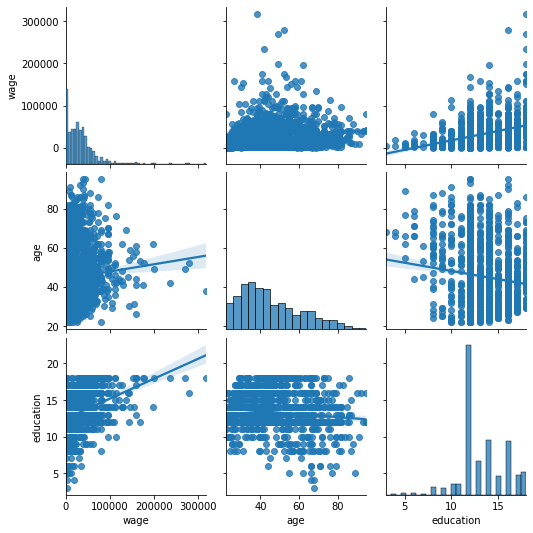

In [40]:
import seaborn
seaborn.pairplot(data_wages, vars=['wage', 'age', 'education'],
                 kind='reg')

Categorical variables can be plotted as the hue.

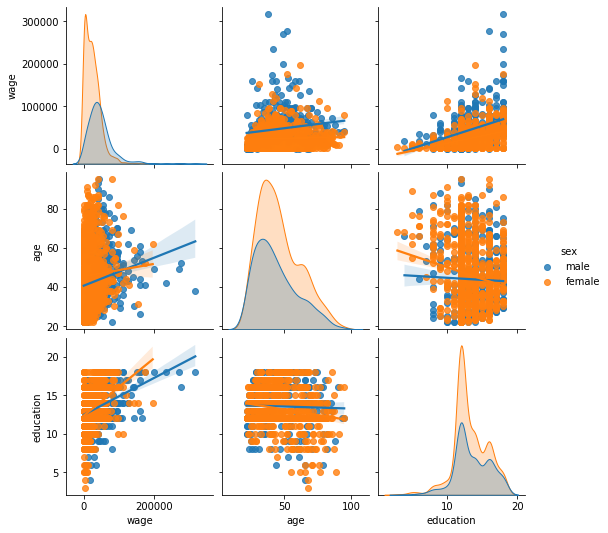

In [41]:
seaborn.pairplot(data_wages, vars=['wage', 'age', 'education'],
                 kind='reg', hue='sex')

4.2. lmplot: plotting a univariate regression

A regression capturing the relation between one variable and another, eg wage and eduction, can be plotted using *seaborn.lmplot()*:

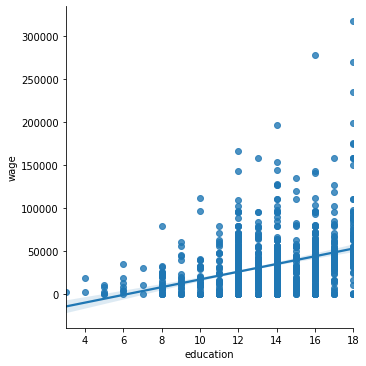

In [42]:
seaborn.lmplot(y='wage', x='education', data=data_wages)

### **5. Testing for interactions**

Do wages increase more with education for males than females?

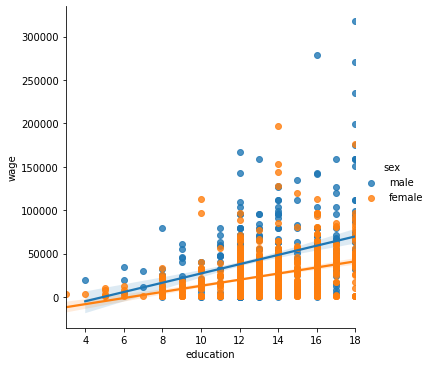

In [43]:
seaborn.lmplot(y='wage', x='education', hue='sex', data=data_wages)

The plot above is made of two different fits. We need to formulate a single model that tests for a variance of slope across the two populations. This is done via an "interaction".

In [44]:
result = ols(formula='wage ~ education + sex + education * sex',
                data=data_wages).fit()  
                
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     135.0
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.12e-76
Time:                        09:04:14   Log-Likelihood:                -16051.
No. Observations:                1379   AIC:                         3.211e+04
Df Residuals:                    1375   BIC:                         3.213e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.238e+

### **6. Other plots**

6.1. Boxplots

Plot boxplots for FSIQ, PIQ, and the paired difference between the two: while the spread (error bars) for FSIQ and PIQ are very large, there is a systematic (common) effect due to the subjects. This effect is cancelled out in the difference and the spread of the difference ("paired" by subject) is much smaller than the spread of the individual measures.

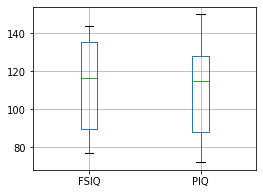

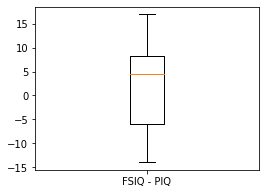

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
data_brain.boxplot(column=['FSIQ', 'PIQ'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(data_brain['FSIQ'] - data_brain['PIQ'])
plt.xticks((1, ), ('FSIQ - PIQ', ))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


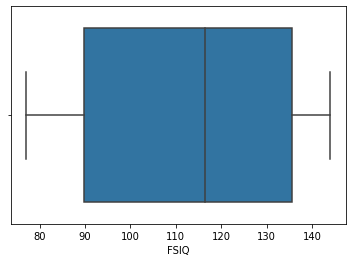

In [46]:
seaborn.boxplot(data_brain['FSIQ'])

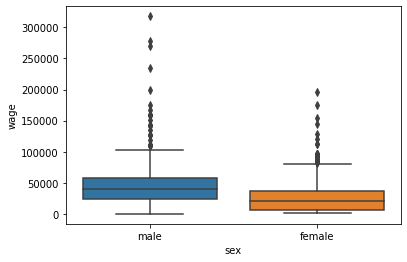

In [47]:
ax = seaborn.boxplot(x="sex", y="wage", data=data_wages)

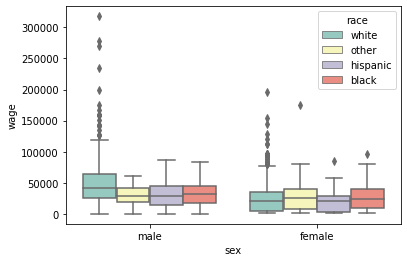

In [48]:
ax = seaborn.boxplot(x="sex", y="wage", hue="race",
                 data=data_wages, palette="Set3")

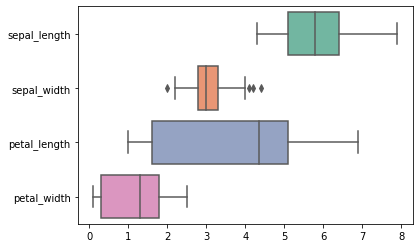

In [49]:
ax = seaborn.boxplot(data=data_iris, orient="h", palette="Set2")

6.2. Scatterplots

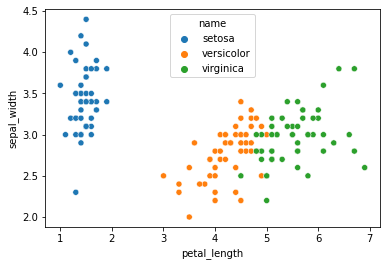

In [50]:
seaborn.scatterplot(x='petal_length', y='sepal_width', data=data_iris, hue='name', marker='o')

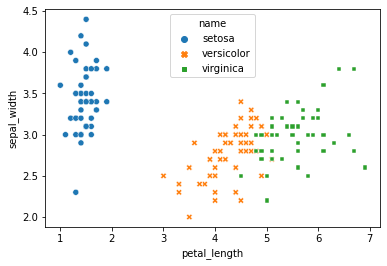

In [51]:
seaborn.scatterplot(x='petal_length', y='sepal_width', data=data_iris, hue='name', style='name',marker='o')

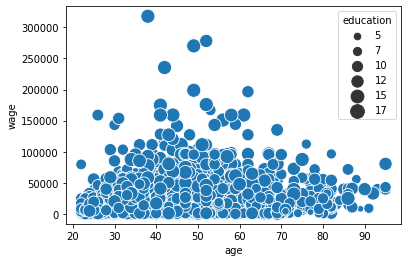

In [52]:
seaborn.scatterplot(data=data_wages, x="age", y="wage", size="education", sizes=(20, 200))

6.3. Regression models


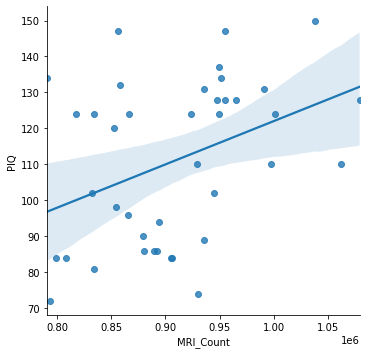

In [53]:
seaborn.lmplot(x="MRI_Count", y="PIQ", data=data_brain)

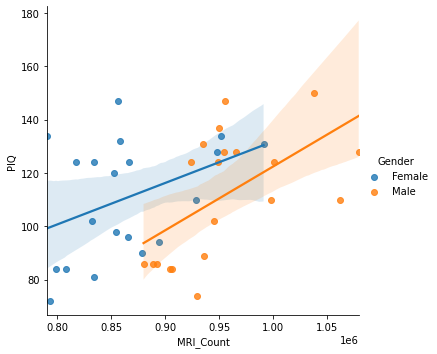

In [54]:
seaborn.lmplot(x="MRI_Count", y="PIQ", hue="Gender", data=data_brain)

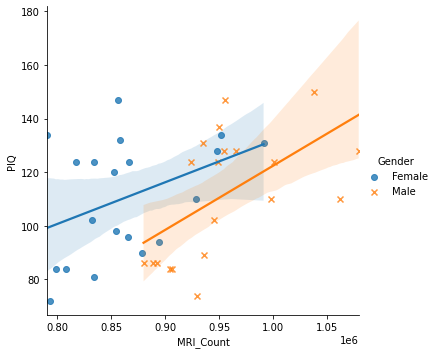

In [55]:
seaborn.lmplot(x="MRI_Count", y="PIQ", hue="Gender", data=data_brain, markers=["o", "x"])

Bland–Altman plot

---
A [Bland–Altman plot](https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot))

print(data)) (difference plot) in analytical chemistry or biomedicine is a method of data plotting used in analyzing the agreement between two different assays.


In [56]:
diff_y = data.y - data.predicted_y
mean_y = (data.y + data.predicted_y) / 2

data = data.join(pandas.DataFrame({'mean_y': mean_y, 'diff_y': diff_y}))

print(data)

           x          y  predicted_y     mean_y    diff_y
0  -5.000000 -13.502619   -20.217900 -16.860259  6.715282
1  -4.473684 -20.868078   -18.672169 -19.770124 -2.195909
2  -3.947368 -18.954792   -17.126439 -18.040616 -1.828354
3  -3.421053 -19.555032   -15.580708 -17.567870 -3.974324
4  -2.894737 -10.222580   -14.034977 -12.128779  3.812397
5  -2.368421 -21.311418   -12.489247 -16.900332 -8.822171
6  -1.842105  -3.547069   -10.943516  -7.245292  7.396447
7  -1.315789 -11.992196    -9.397785 -10.694991 -2.594411
8  -0.789474  -6.092265    -7.852055  -6.972160  1.759790
9  -0.263158  -6.786955    -6.306324  -6.546640 -0.480631
10  0.263158   1.637905    -4.760593  -1.561344  6.398499
11  0.789474 -10.872142    -3.214863  -7.043502 -7.657279
12  1.315789  -2.342300    -1.669132  -2.005716 -0.673169
13  1.842105  -1.009902    -0.123401  -0.566651 -0.886501
14  2.368421   6.640341     1.422330   4.031335  5.218011
15  2.894737  -0.715355     2.968060   1.126353 -3.683415
16  3.421053  

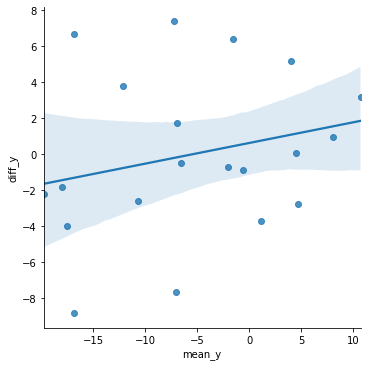

In [57]:
seaborn.lmplot(x="mean_y", y="diff_y", data=data)

6.4. Histograms and Kernel density estimation (KDE)

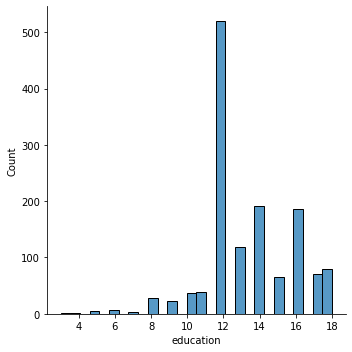

In [58]:
seaborn.displot(x="education", data=data_wages)

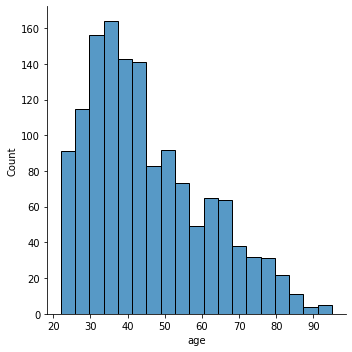

In [59]:
seaborn.displot(x="age", data=data_wages)

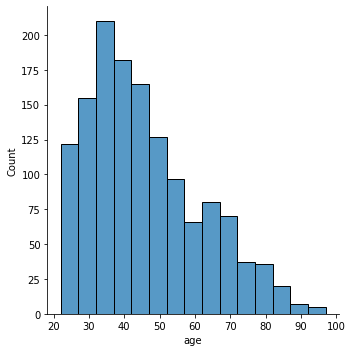

In [60]:
seaborn.displot(x="age", data=data_wages, binwidth=5)

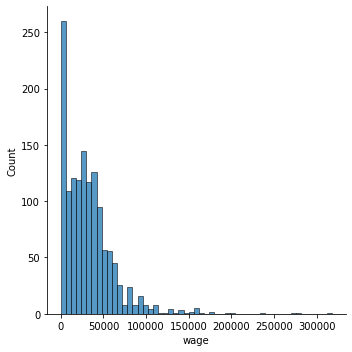

In [61]:
seaborn.displot(x="wage", data=data_wages)

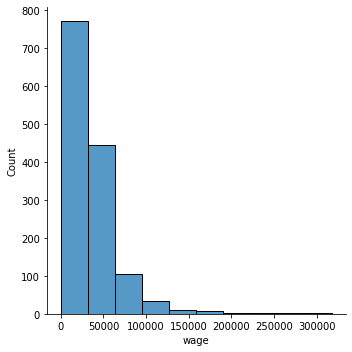

In [62]:
seaborn.displot(x="wage", data=data_wages, bins = 10)

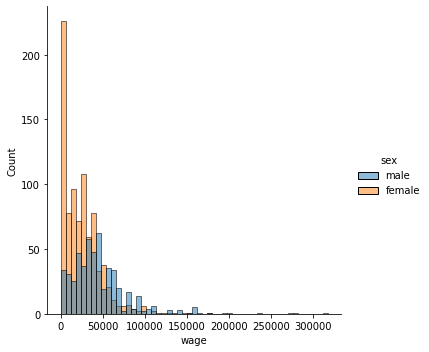

In [63]:
seaborn.displot(x="wage", hue="sex", data=data_wages)

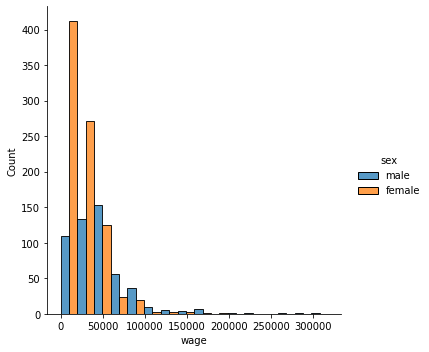

In [64]:
seaborn.displot(x="wage", hue="sex", multiple="dodge", bins=16, data=data_wages)

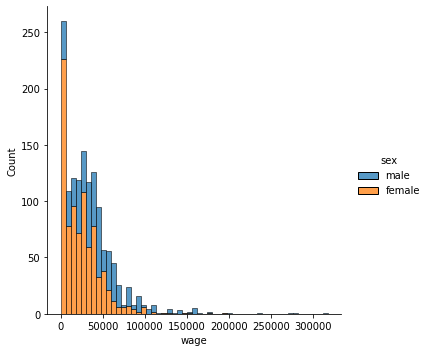

In [65]:
seaborn.displot(x="wage", hue="sex", multiple="stack", data=data_wages)

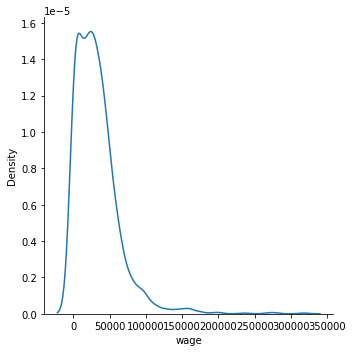

In [66]:
seaborn.displot(x="wage", data=data_wages, kind="kde")

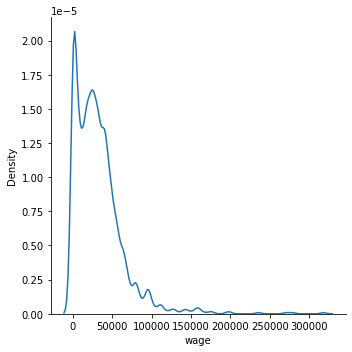

In [67]:
seaborn.displot(x="wage", data=data_wages, kind="kde", bw_adjust = 0.5)

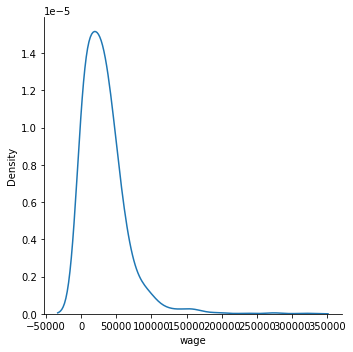

In [68]:
seaborn.displot(x="wage", data=data_wages, kind="kde", bw_adjust = 1.5)

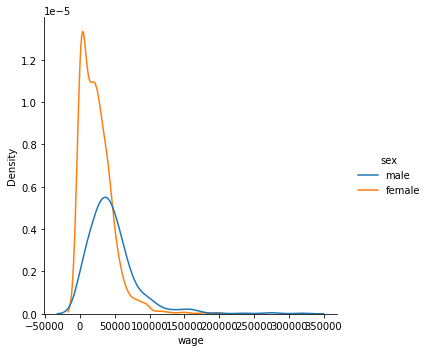

In [69]:
seaborn.displot(x="wage", data=data_wages, hue="sex", kind="kde")

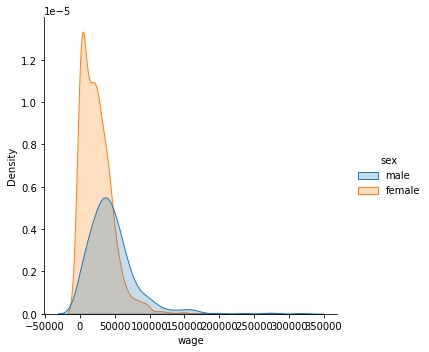

In [70]:
seaborn.displot(x="wage", data=data_wages, hue="sex", kind="kde", fill=True)

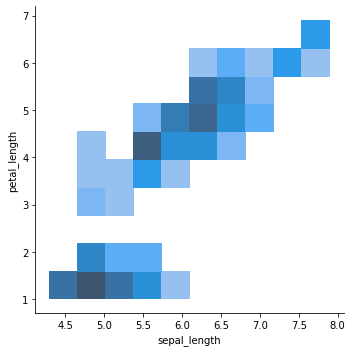

In [71]:
seaborn.displot(x="sepal_length", y="petal_length", data=data_iris, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'bins'
  **contour_kws,


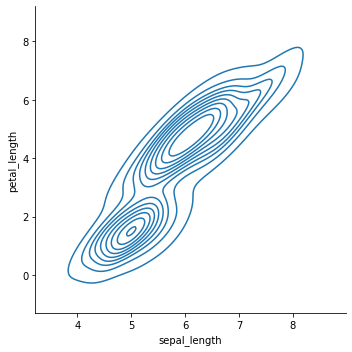

In [72]:
seaborn.displot(x="sepal_length", y="petal_length", data=data_iris, bins=10, kind="kde")

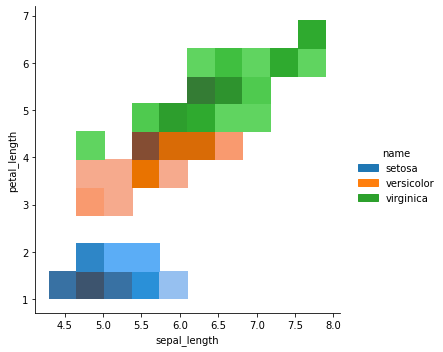

In [73]:
seaborn.displot(x="sepal_length", y="petal_length", hue="name", data=data_iris, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'bins'
  **contour_kws,


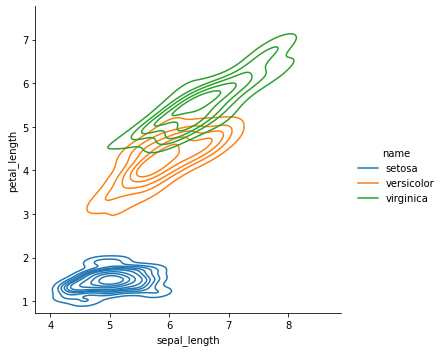

In [74]:
seaborn.displot(x="sepal_length", y="petal_length", hue="name", data=data_iris, bins=10, kind="kde")

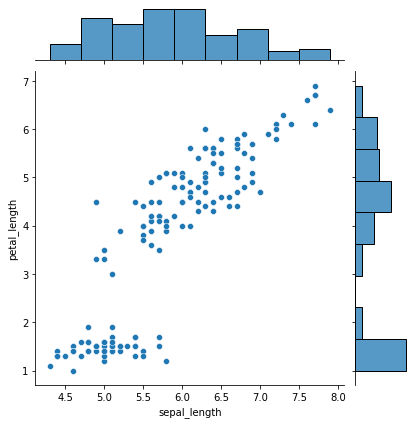

In [75]:
seaborn.jointplot(x="sepal_length", y="petal_length", data=data_iris)

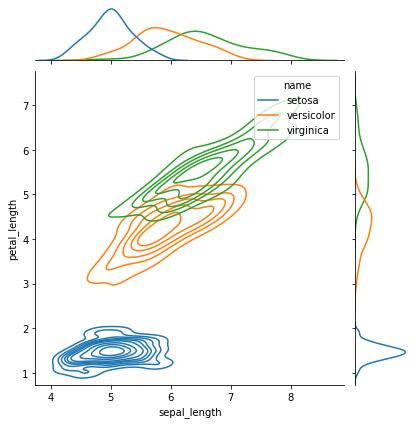

In [76]:
seaborn.jointplot(x="sepal_length", y="petal_length",  hue="name", data=data_iris, kind="kde")